<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drowsiness detection
This notebook focusses on calculating eye aspect ratio (EAR) from this publication:

Cech, J., & Soukupova, T. (2016). Real-time eye blink detection using facial landmarks. Cent. Mach. Perception, Dep. Cybern. Fac. Electr. Eng. Czech Tech. Univ. Prague, 1-8.

<img src="https://raw.githubusercontent.com/albertofernandezvillan/ml-dl-cv-notebooks/main/assets/eye_aspect_ratio.png" width=600>

In [2]:
import cv2
import dlib
from scipy.spatial import distance

def calculate_EAR(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear_aspect_ratio = (A+B)/(2.0*C)
	return ear_aspect_ratio

Download `shape_predictor_68_face_landmarks.dat`, which is required for dlib to detect the 68 facial landmarks (points on the face such as the corners of the mouth, along the eyebrows, on the eyes, and so forth.)

**TODO**: Check `shape_predictor_68_face_landmarks_GTX.dat`: The resulted model is smaller, faster, smoother and more accurate. See here: https://github.com/davisking/dlib-models

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter11/01-chapter-content/facial_landmarks/shape_predictor_68_face_landmarks.dat
!wget https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter11/01-chapter-content/facial_landmarks/face_test.png

In [6]:
hog_face_detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [29]:
test_img = cv2.imread("/content/Abdel_Madi_Shabneh_0001.jpg")
test_img = cv2.resize(test_img, (600,600))
gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
print(test_img.shape)

(600, 600, 3)


In [30]:
face = hog_face_detector(gray_test_img)
print(face)

rectangles[[(88, 138) (534, 584)]]


In [31]:
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))

In [32]:
import numpy as np

def shape_to_np(dlib_shape, dtype="int"):
    """Converts dlib shape object to numpy array"""

    # Initialize the list of (x,y) coordinates
    coordinates = np.zeros((dlib_shape.num_parts, 2), dtype=dtype)

    # Loop over all facial landmarks and convert them to a tuple with (x,y) coordinates:
    for i in range(0, dlib_shape.num_parts):
        coordinates[i] = (dlib_shape.part(i).x, dlib_shape.part(i).y)

    # Return the list of (x,y) coordinates:
    return coordinates

def draw_shape_points_pos(np_shape, image):
    """Draws the shape using points and position for every landmark"""

    for idx, (x, y) in enumerate(np_shape):
        # Draw the positions for every detected landmark:
        cv2.putText(image, str(idx + 1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255))

        # Draw a point on every landmark position:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

In [33]:
face_landmarks = dlib_facelandmark(gray_test_img, face[0])
print(face_landmarks)

In [ ]:
face_landmarks = shape_to_np(face_landmarks)
print(face_landmarks)

In [ ]:
left_eye_landmarks = face_landmarks[LEFT_EYE_POINTS]
print(left_eye_landmarks)

In [ ]:
right_eye_landmarks = face_landmarks[RIGHT_EYE_POINTS]
print(right_eye_landmarks)

In [40]:
draw_shape_points_pos(left_eye_landmarks, test_img)
draw_shape_points_pos(right_eye_landmarks, test_img)

In [41]:
from google.colab.patches import cv2_imshow

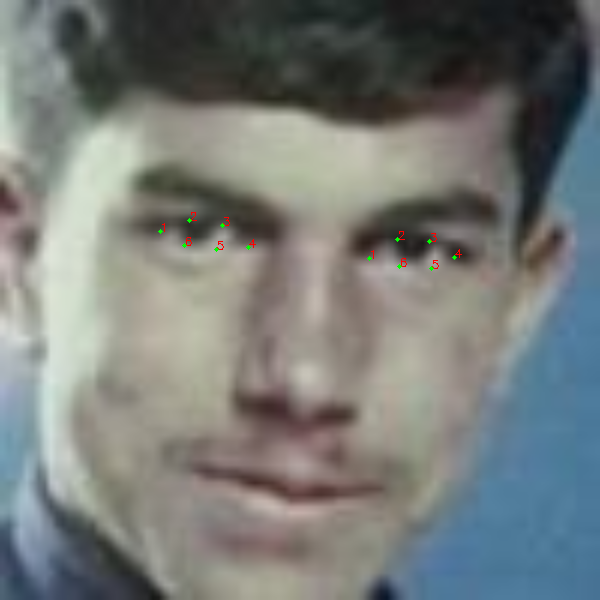

In [42]:
cv2_imshow(test_img)

In [45]:
ear_left = calculate_EAR(left_eye_landmarks)
ear_right = calculate_EAR(right_eye_landmarks)
print(ear_left)
print(ear_right)

0.31849528593532184
0.28081509499678553
